In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# print(pd.__version__)
import leaguedata as ld

#Progress bars wooo
from ipywidgets import IntProgress
from IPython.display import display
from IPython.display import Markdown

In [2]:
matches = ld.get_all_matches()
print(len(matches))

7620


In [193]:
data = pd.concat([pd.read_csv("final_data_1.csv"),pd.read_csv("final_data_2.csv")],ignore_index=True)

# data = pd.read_csv("small_test_data.csv")
data_no_overlap = data.drop(['Kill freq','Structure freq'], axis=1)
data_no_overlap

,Unnamed: 0,Address,Minute,Blue kills,Blue deaths,Blue kill freq,Blue death freq,Red structures taken,Blue structures lost,Blue structure freq,Red structure freq,Blue gold,Gold diff,Delta gold diff,Blue win
0,0,http://matchhistory.na.leagueoflegends.com/en/...,1,0,0,0.0,0.0,0,0,0.0,0.0,2415.0,0.0,0.0,True
1,1,http://matchhistory.na.leagueoflegends.com/en/...,2,0,0,0.0,0.0,0,0,0.0,0.0,2415.0,0.0,0.0,True
2,2,http://matchhistory.na.leagueoflegends.com/en/...,3,0,0,0.0,0.0,0,0,0.0,0.0,2711.0,-14.0,-14.0,True
3,3,http://matchhistory.na.leagueoflegends.com/en/...,4,0,0,0.0,0.0,0,0,0.0,0.0,3887.0,-65.0,-65.0,True
4,4,http://matchhistory.na.leagueoflegends.com/en/...,5,0,0,0.0,0.0,0,0,0.0,0.0,5068.0,-268.0,-268.0,True
5,5,http://matchhistory.na.leagueoflegends.com/en/...,6,0,0,0.0,0.0,0,0,0.0,0.0,6171.0,-431.0,-417.0,True
6,6,http://matchhistory.na.leagueoflegends.com/en/...,7,0,0,0.0,0.0,0,0,0.0,0.0,7412.0,-488.0,-423.0,True
7,7,http://matchhistory.na.leagueoflegends.com/en/...,8,0,0,0.0,0.0,0,0,0.0,0.0,8661.0,-789.0,-521.0,True
8,8,http://matchhistory.na.leagueoflegends.com/en/...,9,0,0,0.0,0.0,0,0,0.0,0.0,10154.0,-494.0,-63.0,True
9,9,http://matchhistory.na.leagueoflegends.com/en/...,10,0,0,0.0,0.0,0,0,0.0,0.0,11361.0,-625.0,-137.0,True


In [194]:
#Standardisation for LASSO
# datatest = data_no_overlap.drop('Address', axis=1)
# means = data_no_overlap.mean(axis=0)
# stds = data_no_overlap.std(axis=0)
# #print(data)
# datatest = (datatest - means) / stds
# datatest["Blue win"] = data["Blue win"] # set the wins back to bool
# datatest

In [195]:
X_data_no_address = data_no_overlap.drop(['Address','Blue win'], axis=1)
addresses = pd.DataFrame({'Address' : data['Address'].values})

In [196]:

# means = X_data_no_address.mean(axis=0)
# stds = X_data_no_address.std(axis=0)
# X_std = (X_data_no_address - means) / stds

# data_no_address
# # #print(data)
# # datatest["Blue win"] = data["Blue win"] # set the wins back to bool
# # datatest
# X_train_std

X_std,means,stds = ld.standardise(X_data_no_address)

#Adding the addresses back in....
X_std_address = pd.concat([X_std,addresses], axis = 1)
X_std_address

,Unnamed: 0,Minute,Blue kills,Blue deaths,Blue kill freq,Blue death freq,Red structures taken,Blue structures lost,Blue structure freq,Red structure freq,Blue gold,Gold diff,Delta gold diff,Address
0,-1.731360,-1.600736,-0.947001,-0.871239,-0.814278,-0.782009,-0.886580,-0.842918,-0.673838,-0.640993,-1.386847,-0.108020,-0.048625,http://matchhistory.na.leagueoflegends.com/en/...
1,-1.730438,-1.515822,-0.947001,-0.871239,-0.814278,-0.782009,-0.886580,-0.842918,-0.673838,-0.640993,-1.386847,-0.108020,-0.048625,http://matchhistory.na.leagueoflegends.com/en/...
2,-1.729517,-1.430909,-0.947001,-0.871239,-0.814278,-0.782009,-0.886580,-0.842918,-0.673838,-0.640993,-1.371225,-0.111141,-0.057293,http://matchhistory.na.leagueoflegends.com/en/...
3,-1.728595,-1.345995,-0.947001,-0.871239,-0.814278,-0.782009,-0.886580,-0.842918,-0.673838,-0.640993,-1.309159,-0.122509,-0.088869,http://matchhistory.na.leagueoflegends.com/en/...
4,-1.727674,-1.261081,-0.947001,-0.871239,-0.814278,-0.782009,-0.886580,-0.842918,-0.673838,-0.640993,-1.246829,-0.167758,-0.214552,http://matchhistory.na.leagueoflegends.com/en/...
5,-1.726753,-1.176167,-0.947001,-0.871239,-0.814278,-0.782009,-0.886580,-0.842918,-0.673838,-0.640993,-1.188617,-0.204092,-0.306802,http://matchhistory.na.leagueoflegends.com/en/...
6,-1.725831,-1.091253,-0.947001,-0.871239,-0.814278,-0.782009,-0.886580,-0.842918,-0.673838,-0.640993,-1.123120,-0.216797,-0.310517,http://matchhistory.na.leagueoflegends.com/en/...
7,-1.724910,-1.006339,-0.947001,-0.871239,-0.814278,-0.782009,-0.886580,-0.842918,-0.673838,-0.640993,-1.057202,-0.283891,-0.371192,http://matchhistory.na.leagueoflegends.com/en/...
8,-1.723988,-0.921425,-0.947001,-0.871239,-0.814278,-0.782009,-0.886580,-0.842918,-0.673838,-0.640993,-0.978406,-0.218135,-0.087631,http://matchhistory.na.leagueoflegends.com/en/...
9,-1.723067,-0.836511,-0.947001,-0.871239,-0.814278,-0.782009,-0.886580,-0.842918,-0.673838,-0.640993,-0.914705,-0.247335,-0.133446,http://matchhistory.na.leagueoflegends.com/en/...


In [197]:
from sklearn.model_selection import train_test_split

y = data_no_overlap['Blue win'].values
# X = data_no_overlap.drop(['Blue win'], axis=1)

X = X_std_address

X_train_address, X_test_address, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print(len(X_test_address)/len(X), len(X_train_address)/len(X))

0.2000532056397978 0.7999467943602022


In [198]:
X_train = X_train_address.drop(['Address'],axis=1)
X_test = X_test_address.drop(['Address'],axis=1)

In [199]:
Penalty = 0.1 #Penalty: 1 small - 0.01 big, from slides
from sklearn.linear_model import LogisticRegression as logreg
# print(titanic[["Pclass_1","Pclass_2","Pclass_3"]])

# y = datatest['Blue Win'].values#.reshape(-1, 1)
# print(y)
# X = datatest.drop('Blue Win', axis=1)

# print(X)
# print(y)
mylr = logreg(C=Penalty, penalty='l1', solver='liblinear')
# mylr = logreg()
mylr.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [200]:
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

class ModelSummary:
    """ This class extracts a summary of the model
    
    Methods
    -------
    get_se()
        computes standard error
    get_ci(SE_est)
        computes confidence intervals
    get_pvals()
        computes p-values
    get_summary(name=None)
        prints the summary of the model
    """
    
    def __init__(self, clf, X, y):
        """
        Parameters
        ----------
        clf: class
            the classifier object model
        X: pandas Dataframe
            matrix of predictors
        y: numpy array
            matrix of variable
        """
        self.clf = clf
        self.X = X
        self.y = y
        pass
    
    def get_se(self):
        """Computes the standard error

        Returns
        -------
            numpy array of standard errors
        """
        # from here https://stats.stackexchange.com/questions/89484/how-to-compute-the-standard-errors-of-a-logistic-regressions-coefficients
        predProbs = self.clf.predict_proba(self.X)
        X_design = np.hstack([np.ones((self.X.shape[0], 1)), self.X])
        V = np.diagflat(np.product(predProbs, axis=1))
        covLogit = np.linalg.inv(np.dot(np.dot(X_design.T, V), X_design))
        return np.sqrt(np.diag(covLogit))

    def get_ci(self, SE_est):
        """Computes the confidence interval

        Parameters
        ----------
        SE_est: numpy array
            matrix of standard error estimations
        
        Returns
        -------
        cis: numpy array
            matrix of confidence intervals
        """
        p = 0.975
        df = len(self.X) - 2
        crit_t_value = stats.t.ppf(p, df)
        coefs = np.concatenate([self.clf.intercept_, self.clf.coef_[0]])
        upper = coefs + (crit_t_value * SE_est)
        lower = coefs - (crit_t_value * SE_est)
        cis = np.zeros((len(coefs), 2))
        cis[:,0] = lower
        cis[:,1] = upper
        return cis
    
    def get_pvals(self):
        """Computes the p-value

        Returns
        -------
        p: numpy array
            matrix of p-values
        """
        # from here https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance
        p = self.clf.predict_proba(self.X)
        n = len(p)
        m = len(self.clf.coef_[0]) + 1
        coefs = np.concatenate([self.clf.intercept_, self.clf.coef_[0]])
        se = self.get_se()
        t =  coefs/se  
        p = (1 - stats.norm.cdf(abs(t))) * 2
        return p
    
    def get_summary(self, names=None):
        """Prints the summary of the model

        Parameters
        ----------
        names: list
            list of the names of predictors
        """
        ses = self.get_se()
        cis = self.get_ci(ses)
        lower = cis[:, 0]
        upper = cis[:, 1]
        pvals = self.get_pvals()
        coefs = np.concatenate([self.clf.intercept_, self.clf.coef_[0]])
        data = []
        for i in range(len(coefs)):
            currlist = []
            currlist.append(np.round(coefs[i], 3))
            currlist.append(np.round(ses[i], 3))
            currlist.append(np.round(pvals[i], 3))
            currlist.append(np.round(lower[i], 3))
            currlist.append(np.round(upper[i], 3))
            data.append(currlist)
        cols = ['coefficient', 'std', 'p-value', '[0.025', '0.975]']
        sumdf = pd.DataFrame(columns=cols, data=data)
        if names is not None:
            new_names = ['intercept']*(len(names) + 1)
            new_names[1:] = [i for i in names]
            sumdf.index = new_names
        else:
            try:
                names = list(self.X.columns)
                new_names = ['intercept']*(len(names) + 1)
                new_names[1:] = [i for i in names]
                sumdf.index = new_names
            except:
                pass
        print(sumdf)
        acc = accuracy_score(self.y, self.clf.predict(self.X))
        confmat = confusion_matrix(self.y, self.clf.predict(self.X))
        print('-'*60)
        print('Confusion Matrix (total:{}) \t Accuracy: \t  {}'.format(len(self.X),np.round(acc, 3)))
        print('  TP: {} | FN: {}'.format(confmat[1][1],confmat[1][0]))
        print('  FP: {} | TN: {}'.format(confmat[0][1],confmat[0][0]))

In [201]:
modsummary = ModelSummary(mylr, X_train, y_train)
modsummary.get_summary()

                      coefficient    std  p-value  [0.025  0.975]
intercept                   0.279  0.051    0.000   0.178   0.380
Unnamed: 0                  0.000  0.048    1.000  -0.094   0.094
Minute                     -0.196  0.807    0.808  -1.778   1.386
Blue kills                  0.415  0.202    0.040   0.019   0.811
Blue deaths                -1.439  0.210    0.000  -1.851  -1.028
Blue kill freq              0.238  0.101    0.018   0.041   0.436
Blue death freq            -0.222  0.105    0.035  -0.428  -0.016
Red structures taken        0.174  0.192    0.365  -0.202   0.550
Blue structures lost        1.033  0.187    0.000   0.665   1.400
Blue structure freq         0.000  0.103    1.000  -0.203   0.203
Red structure freq         -0.175  0.095    0.064  -0.361   0.010
Blue gold                   0.000  0.987    1.000  -1.935   1.935
Gold diff                   1.967  0.224    0.000   1.526   2.407
Delta gold diff            -0.026  0.111    0.816  -0.244   0.192
----------

In [202]:
# print(X_test)
# print(y_test)

In [203]:
y_predict = mylr.predict(X_test)
print(y_predict)
# y_predict

[ True  True  True  True False  True False False  True False False  True
  True False  True False  True  True  True  True  True  True False  True
 False  True False  True  True  True  True  True  True  True False False
 False  True  True  True  True  True False False  True  True False  True
  True False  True  True  True False False  True  True  True False  True
  True  True False  True  True False  True False  True  True False False
  True  True  True False  True  True  True  True  True  True False  True
  True False  True  True  True False  True  True  True  True False  True
  True  True  True False False  True  True  True False  True False  True
  True  True False False  True  True  True  True  True  True  True  True
 False False  True  True False  True  True  True  True  True False False
 False  True  True False  True  True False  True  True  True  True False
 False False  True False False False  True False False False  True False
  True False  True  True False  True  True False Fa

In [205]:
test_summary = ModelSummary(mylr, X_test, y_test)
test_summary.get_summary()

                      coefficient    std  p-value  [0.025  0.975]
intercept                   0.279  0.105    0.008   0.072   0.486
Unnamed: 0                  0.000  0.088    1.000  -0.172   0.172
Minute                     -0.196  1.627    0.904  -3.390   2.997
Blue kills                  0.415  0.429    0.333  -0.428   1.258
Blue deaths                -1.439  0.438    0.001  -2.300  -0.579
Blue kill freq              0.238  0.222    0.284  -0.198   0.675
Blue death freq            -0.222  0.208    0.287  -0.631   0.187
Red structures taken        0.174  0.383    0.650  -0.578   0.925
Blue structures lost        1.033  0.412    0.012   0.223   1.842
Blue structure freq         0.000  0.201    1.000  -0.394   0.394
Red structure freq         -0.175  0.223    0.433  -0.613   0.263
Blue gold                   0.000  2.012    1.000  -3.949   3.949
Gold diff                   1.967  0.473    0.000   1.039   2.894
Delta gold diff            -0.026  0.235    0.913  -0.487   0.435
----------

In [173]:
import random
# print(len(matches)-100)
# matches[1]
rand_game_index = random.randint(len(matches)-100,len(matches))
# random_game = random.randomint(1,len())
# unique_games = X_test_address["Address"].unique()
# rand_game_index = random.randint(1,len(unique_games))
# # print(rand_game)
# single_test_games
# print(matches[rand_game_index])

In [174]:
# rand_game_address = X_test_address["Address"].unique()[rand_game_index]
# rand_game = X_test_address.loc[X_test_address["Address"] == rand_game_address]
# # rand_game = 

In [192]:
graph_data = None

game = matches[rand_game_index]
for minute in range(1,game.length()):
    segment_data = game.game_state(minute)
    if minute == 0:
        graph_data = segment_data
    else:
        graph_data = pd.concat([graph_data,segment_data],ignore_index=True)

In [176]:
graph_data

,Address,Minute,Blue kills,Blue deaths,Kill freq,Blue kill freq,Blue death freq,Red structures taken,Blue structures lost,Structure freq,Blue structure freq,Red structure freq,Blue gold,Gold diff,Delta gold diff,Blue win
0,https://matchhistory.na.leagueoflegends.com/en...,1,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2500.0,0.0,0.0,False
1,https://matchhistory.na.leagueoflegends.com/en...,2,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2500.0,0.0,0.0,False
2,https://matchhistory.na.leagueoflegends.com/en...,3,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2933.0,-90.0,-90.0,False
3,https://matchhistory.na.leagueoflegends.com/en...,4,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,4726.0,105.0,105.0,False
4,https://matchhistory.na.leagueoflegends.com/en...,5,0,1,0.2,0.0,0.2,0,0,0.0,0.0,0.0,6316.0,78.0,78.0,False
5,https://matchhistory.na.leagueoflegends.com/en...,6,0,1,0.2,0.0,0.2,0,0,0.0,0.0,0.0,7841.0,-353.0,-263.0,False
6,https://matchhistory.na.leagueoflegends.com/en...,7,1,1,0.4,0.2,0.2,0,0,0.0,0.0,0.0,9469.0,-141.0,-246.0,False
7,https://matchhistory.na.leagueoflegends.com/en...,8,1,1,0.4,0.2,0.2,0,0,0.0,0.0,0.0,11115.0,96.0,18.0,False
8,https://matchhistory.na.leagueoflegends.com/en...,9,1,1,0.4,0.2,0.2,0,0,0.0,0.0,0.0,12679.0,169.0,522.0,False
9,https://matchhistory.na.leagueoflegends.com/en...,10,2,1,0.4,0.4,0.0,1,0,0.2,0.2,0.0,14774.0,646.0,787.0,False


In [177]:
# print(means,stds)
# len(means)

Minute                     19.292580
Blue kills                  4.435556
Blue deaths                 4.271168
Blue kill freq              0.283728
Blue death freq             0.272169
Red structures taken        2.520740
Blue structures lost        2.334384
Blue structure freq         0.162052
Red structure freq          0.147110
Blue gold               29295.059879
Gold diff                 144.650044
Delta gold diff            33.662187
dtype: float64 Minute                     11.802128
Blue kills                  4.768339
Blue deaths                 4.802092
Blue kill freq              0.357331
Blue death freq             0.353657
Red structures taken        2.625625
Blue structures lost        2.468343
Blue structure freq         0.236388
Red structure freq          0.223851
Blue gold               19905.428433
Gold diff                4106.036158
Delta gold diff          1554.379104
dtype: float64


In [178]:
graph_data_clean = graph_data.drop(["Address","Structure freq","Kill freq","Blue win"],axis = 1)
graph_data_std = ld.standardise(graph_data_clean,means,stds)
graph_data_std[0]

,Minute,Blue kills,Blue deaths,Blue kill freq,Blue death freq,Red structures taken,Blue structures lost,Blue structure freq,Red structure freq,Blue gold,Gold diff,Delta gold diff
0,-1.549939,-0.930210,-0.889439,-0.794021,-0.769586,-0.960053,-0.945729,-0.685536,-0.657178,-1.346118,-0.035229,-0.021656
1,-1.465209,-0.930210,-0.889439,-0.794021,-0.769586,-0.960053,-0.945729,-0.685536,-0.657178,-1.346118,-0.035229,-0.021656
2,-1.380478,-0.930210,-0.889439,-0.794021,-0.769586,-0.960053,-0.945729,-0.685536,-0.657178,-1.324365,-0.057148,-0.079557
3,-1.295748,-0.930210,-0.889439,-0.794021,-0.769586,-0.960053,-0.945729,-0.685536,-0.657178,-1.234289,-0.009657,0.045895
4,-1.211017,-0.930210,-0.681197,-0.794021,-0.204066,-0.960053,-0.945729,-0.685536,-0.657178,-1.154412,-0.016232,0.028524
5,-1.126287,-0.930210,-0.681197,-0.794021,-0.204066,-0.960053,-0.945729,-0.685536,-0.657178,-1.077799,-0.121200,-0.190856
6,-1.041556,-0.720493,-0.681197,-0.234315,-0.204066,-0.960053,-0.945729,-0.685536,-0.657178,-0.996013,-0.069568,-0.179919
7,-0.956826,-0.720493,-0.681197,-0.234315,-0.204066,-0.960053,-0.945729,-0.685536,-0.657178,-0.913322,-0.011848,-0.010076
8,-0.872095,-0.720493,-0.681197,-0.234315,-0.204066,-0.960053,-0.945729,-0.685536,-0.657178,-0.834750,0.005930,0.314169
9,-0.787365,-0.510777,-0.681197,0.325390,-0.769586,-0.579191,-0.945729,0.160532,-0.657178,-0.729503,0.122101,0.484655


In [179]:
graph_predict = mylr.predict(graph_data_std[0])
print(graph_predict)

[ True  True  True  True False False  True  True  True  True  True  True
  True False False  True False False False False False False False False
 False False]


In [189]:
past_N_predicts = []
total_predicts = []
game_range = 5
# print(graph_predict*1)
for index in range(1,len(graph_predict)+1):
    total_predicts.append(((graph_predict*1)[:index]*2-1).mean())
    if index < game_range+1:
        past_N_predicts.append(None)
    else:
        past_N_predicts.append(((graph_predict*1)[index-game_range:index]*2-1).mean())

In [190]:
# total_predicts
gold_data = graph_data["Gold diff"]
normal_gold_data = ((gold_data/(max(gold_data.values-min(gold_data.values)))))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


(-1.1, 1.1)

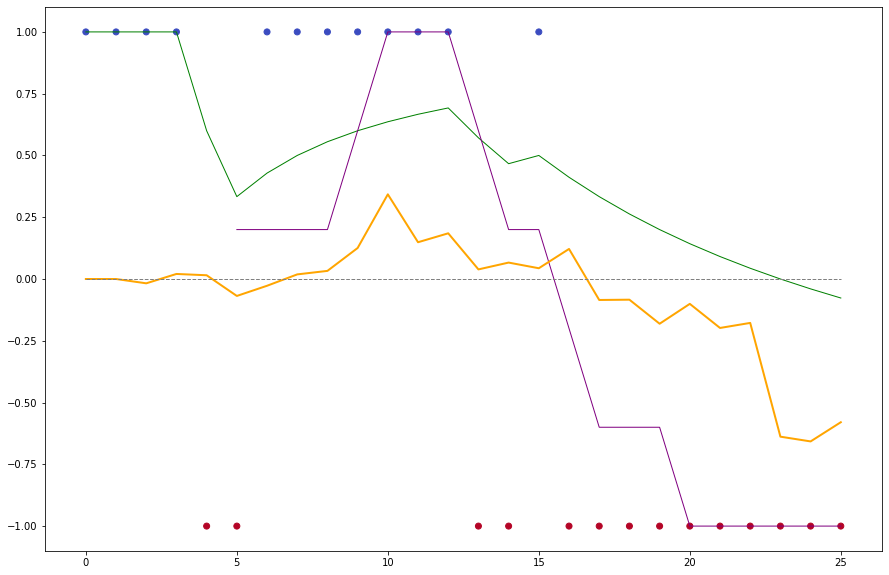

In [191]:
fig, axs = plt.subplots(1, figsize=(15,10))
x = range(0,len(total_predicts))
median = np.full((1,len(total_predicts)), 0)
print(median[0])

axs.plot(x,total_predicts,"green", linewidth=1)

axs.plot(x,past_N_predicts,"purple", linewidth=1)

axs.plot(x,normal_gold_data,"orange", linewidth=2)

axs.plot(x,median[0],"gray",linestyle = 'dashed',linewidth=1)

axs.scatter(x,graph_predict*2-1, c = graph_predict*-1, cmap=plt.cm.coolwarm)

axs.set_ylim([-1.1,1.1])

In [16]:
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_X,real_y)))
score = 0
for result in range(len(y_test)):
    if y_test[result] == y_predict[result]:
        score += 1
accuracy = score/len(y_test)
print(accuracy)

0.7349397590361446
